In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('figure', figsize = (10,6))

In [77]:
%matplotlib inline
# Always make it pretty.
plt.style.use('ggplot')

In [2]:
# Import two datasets
colnames = ["LOAN_ID", "ORIG_CHN", "Seller.Name", "ORIG_RT", "ORIG_AMT", "ORIG_TRM", "ORIG_DTE","FRST_DTE", "OLTV", 
            "OCLTV", "NUM_BO", "DTI", "CSCORE_B", "FTHB_FLG", "PURPOSE", "PROP_TYP","NUM_UNIT", "OCC_STAT", 
            "STATE", "ZIP_3", "MI_PCT", "Product.Type", "CSCORE_C", "MI_TYPE", "RELOCATION_FLG"]
Data_A = pd.read_table('D:/1-Intern/Project_1/2018Q1/Acquisition_2018Q1.txt', 
                       sep = '|', header = None, names = colnames)
colnames_P = ["LOAN_ID", "Monthly.Rpt.Prd", "Servicer.Name", "LAST_RT", "LAST_UPB", "Loan.Age", "Months.To.Legal.Mat", 
              "Adj.Month.To.Mat", "Maturity.Date", "MSA", "Delq.Status", "MOD_FLAG", "Zero.Bal.Code", 
              "ZB_DTE", "LPI_DTE", "FCC_DTE","DISP_DT", "FCC_COST", "PP_COST", "AR_COST", "IE_COST", "TAX_COST", "NS_PROCS",
              "CE_PROCS", "RMW_PROCS", "O_PROCS", "NON_INT_UPB", "PRIN_FORG_UPB_FHFA", "REPCH_FLAG", "PRIN_FORG_UPB_OTH", "TRANSFER_FLG"]
Data_P = pd.read_table('D:/1-Intern/Project_1/2018Q1/Performance_2018Q1.txt', 
                       sep = '|', header = None, names = colnames_P,low_memory=False)

In [3]:
# Convert string into datetime
from datetime import datetime 
Data_P['Monthly.Rpt.Prd']=[datetime.strptime(x, '%m/%d/%Y') for x in Data_P.loc[:, 'Monthly.Rpt.Prd']]

In [4]:
Data_P['Delq.Status_D90']= Data_P['Delq.Status'].replace(['1','2','X'],'0')

In [6]:
Data_P['Delq.Status_D90']= Data_P['Delq.Status_D90'].replace(['3','4','5','6','7','8','9','10','11','12',
                                                     '13','14','15','16','17','18','19','20','21','22'], '1')

In [7]:
Data_P['Delq.Status_D90'].value_counts()

0    9318346
1      13567
Name: Delq.Status_D90, dtype: int64

In [10]:

Data_P['Delq.Status_D90'] = pd.to_numeric(Data_P['Delq.Status_D90'])

In [11]:
Flag_90 = Data_P['Delq.Status_D90'].groupby(Data_P['LOAN_ID']).sum()

In [18]:
Flag_90 = pd.DataFrame(Flag_90)
Flag_90.set_index('index') 

,LOAN_ID,Delq.Status_D90
index,,
0,100001040173,0.0
1,100002370993,0.0
2,100005405807,0.0
3,100008071646,0.0
4,100010739040,0.0
...,...,...
426201,999991303485,0.0
426202,999992661330,0.0
426203,999995056050,0.0


In [19]:
Flag_90['Delq.Status_D90'].value_counts()

0.0     423359
1.0        636
2.0        374
4.0        337
3.0        283
5.0        265
6.0        206
8.0        162
7.0        151
9.0        104
11.0        75
10.0        74
12.0        45
13.0        40
14.0        25
16.0        20
15.0        20
18.0        13
17.0        10
20.0         4
19.0         3
Name: Delq.Status_D90, dtype: int64

In [21]:
# If replace function does not work, then .loc should be applied to tell pandas that is row element wise 

Flag_90['Delq.Status_D90'] = Flag_90.loc[:,'Delq.Status_D90'].replace([2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],1)

In [22]:
Flag_90['Delq.Status_D90'].value_counts()

0.0    423359
1.0      2847
Name: Delq.Status_D90, dtype: int64

In [23]:
Data_A.shape

(426207, 25)

In [24]:
df = pd.merge(Data_A,Flag_90, on = 'LOAN_ID' )

In [31]:
df= df.drop(columns = 'index')

In [32]:
df.shape

(426206, 26)

In [33]:
# Clean Data - dealing with missing values
df.isnull().sum()

LOAN_ID                 0
ORIG_CHN                0
Seller.Name             0
ORIG_RT                 0
ORIG_AMT                0
ORIG_TRM                0
ORIG_DTE                0
FRST_DTE                0
OLTV                    0
OCLTV                   1
NUM_BO                  0
DTI                   111
CSCORE_B              336
FTHB_FLG                0
PURPOSE                 0
PROP_TYP                0
NUM_UNIT                0
OCC_STAT                0
STATE                   0
ZIP_3                   0
MI_PCT             312106
Product.Type            0
CSCORE_C           235423
MI_TYPE            312106
RELOCATION_FLG          0
Delq.Status_D90         0
dtype: int64

In [ ]:
# Option 1: drop CSCORE_C 
df = df.drop(columns = 'CSCORE_C')  

In [36]:
df_fillna = df.copy()

In [37]:
df_fillna['DTI']= df['DTI'].fillna(df['DTI'].median())

In [39]:
df_fillna['CSCORE_B'] = df['CSCORE_B'].fillna(df['CSCORE_B'].median())

In [ ]:
df_fillna['OCLTV'] = df_fillna['OCLTV'].fillna(df['OCLTV'].median())

In [40]:
df_fillna = df_fillna.drop(columns=['MI_PCT','MI_TYPE'])

In [49]:
df_fillna.head()

,LOAN_ID,ORIG_CHN,Seller.Name,ORIG_RT,ORIG_AMT,ORIG_TRM,ORIG_DTE,FRST_DTE,OLTV,OCLTV,...,FTHB_FLG,PURPOSE,PROP_TYP,NUM_UNIT,OCC_STAT,STATE,ZIP_3,Product.Type,RELOCATION_FLG,Delq.Status_D90
0,100001040173,R,QUICKEN LOANS INC.,4.25,453000,360,01/2018,03/2018,65,65.0,...,N,C,PU,1,P,OH,430,FRM,N,0.0
1,100002370993,C,"WELLS FARGO BANK, N.A.",4.25,266000,360,01/2018,03/2018,80,80.0,...,N,R,PU,1,P,IN,467,FRM,N,0.0
2,100005405807,R,PMTT4,3.99,233000,360,12/2017,01/2018,79,79.0,...,N,R,SF,1,P,CA,936,FRM,N,0.0
3,100008071646,R,OTHER,4.25,184000,360,01/2018,03/2018,80,80.0,...,Y,P,PU,1,P,FL,336,FRM,N,0.0
4,100010739040,R,OTHER,4.25,242000,360,02/2018,04/2018,49,49.0,...,N,R,SF,1,P,CA,906,FRM,N,0.0


In [41]:
df_fillna.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 426206 entries, 0 to 426205
Data columns (total 23 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   LOAN_ID          426206 non-null  int64  
 1   ORIG_CHN         426206 non-null  object 
 2   Seller.Name      426206 non-null  object 
 3   ORIG_RT          426206 non-null  float64
 4   ORIG_AMT         426206 non-null  int64  
 5   ORIG_TRM         426206 non-null  int64  
 6   ORIG_DTE         426206 non-null  object 
 7   FRST_DTE         426206 non-null  object 
 8   OLTV             426206 non-null  int64  
 9   OCLTV            426205 non-null  float64
 10  NUM_BO           426206 non-null  int64  
 11  DTI              426206 non-null  float64
 12  CSCORE_B         426206 non-null  float64
 13  FTHB_FLG         426206 non-null  object 
 14  PURPOSE          426206 non-null  object 
 15  PROP_TYP         426206 non-null  object 
 16  NUM_UNIT         426206 non-null  int6

In [51]:
df_fillna['RELOCATION_FLG'].value_counts()

N    423549
Y      2657
Name: RELOCATION_FLG, dtype: int64

In [52]:
# convert bool columns to int 
df_fillna['RELOCATION_FLG'] = df_fillna['RELOCATION_FLG'].astype(str)

In [54]:
df_fillna['FTHB_FLG'].value_counts()

N    333461
Y     92744
U         1
Name: FTHB_FLG, dtype: int64

In [55]:
#Because 'U' is only one value, so convert it to 'n' for future analysis 
df_fillna['FTHB_FLG']=df_fillna['FTHB_FLG'].replace('U', 'N')

In [57]:
df_fillna['FTHB_FLG'] = df_fillna['FTHB_FLG'].astype(str)

In [56]:
df_fillna['FTHB_FLG'].value_counts()

N    333462
Y     92744
Name: FTHB_FLG, dtype: int64

In [ ]:
df_fillna['STATE'].value_counts()

In [59]:
df_fillna_1 = df_fillna.copy()

In [ ]:
# drop 'STATE' for preliminary analysis 
df_fillna_1 = df_fillna_1.drop(columns = ['STATE'])

In [101]:
# Encode categorical columns to numeric values
col_category = ['ORIG_CHN', 'Seller.Name','PURPOSE','PROP_TYP','OCC_STAT','Product.Type']

In [ ]:
df_fillna_1= pd.get_dummies(df_fillna_1, columns = col_category)

In [103]:
df_fillna_1 = pd.get_dummies(df_fillna_1, columns = ['FTHB_FLG','RELOCATION_FLG'])

In [92]:
df_fillna_1['Product.Type_FRM'].value_counts()

1    426206
Name: Product.Type_FRM, dtype: int64

In [ ]:
df_fillna_1 = df_fillna_1.drop(columns= ['Product.Type_FRM'])

In [161]:
df_fillna_1 = df_fillna_1.drop(columns = ['ORIG_DTE','FRST_DTE','OCLTV','ZIP_3'])

In [162]:
# Define a targe, ,which Delq.Status_D90 equals '0' means good loans and '1' is bad loans
df_fillna_1['Delq.Status_D90'] = df_fillna_1['Delq.Status_D90'].astype(int)

In [163]:
y = df_fillna_1['Delq.Status_D90'].values

In [136]:
Continuous_Var = ['ORIG_AMT','ORIG_TRM','OLTV','NUM_BO','DTI','CSCORE_B','NUM_UNIT']

In [164]:
df_fillna_1[Continuous_Var] = (df_fillna_1[Continuous_Var] - df_fillna_1[Continuous_Var].mean())/df_fillna_1[Continuous_Var].std()

In [165]:
df_fillna_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 426206 entries, 0 to 426205
Data columns (total 46 columns):
 #   Column                                                                          Non-Null Count   Dtype  
---  ------                                                                          --------------   -----  
 0   LOAN_ID                                                                         426206 non-null  int64  
 1   ORIG_RT                                                                         426206 non-null  float64
 2   ORIG_AMT                                                                        426206 non-null  float64
 3   ORIG_TRM                                                                        426206 non-null  float64
 4   OLTV                                                                            426206 non-null  float64
 5   NUM_BO                                                                          426206 non-null  float64
 6   DTI 

In [166]:
X = df_fillna_1.drop(columns=['LOAN_ID','Delq.Status_D90']).values

In [168]:
# start to train-test split the data
#import train test split function from sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

In [169]:
from sklearn.linear_model import LogisticRegressionCV
model_cv = LogisticRegressionCV(10)
model_cv.fit(X_train, y_train)

C:\Users\rhoda\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\rhoda\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='auto', n_jobs=None,
                     penalty='l2', random_state=None, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)

In [170]:
# Fit a model by providing x and y from training data
y_train_pred = model_cv.predict(X_train)
p_train_pred = model_cv.predict_proba(X_train)[:,1]

In [171]:
# Make predictions on test data
y_test_pred = model_cv.predict(X_test)
p_test_pred = model_cv.predict_proba(X_test)[:,1]

In [172]:
#Calculate the metric scores for the model
# Import metrics functions from sklearn
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score, roc_auc_score

In [173]:
import pandas as pd
# Helper method to print metric scores
def get_performance_metrics(y_train, p_train_pred, y_test, p_test_pred, threshold=0.5):
    metric_names = ['AUC','Accuracy','Precision','Recall','f1-score']
    metric_values_train = [roc_auc_score(y_train, p_train_pred),
                    accuracy_score(y_train, p_train_pred>threshold),
                    precision_score(y_train, p_train_pred>threshold),
                    recall_score(y_train, p_train_pred>threshold),
                    f1_score(y_train, p_train_pred>threshold)
                   ]
    metric_values_test = [roc_auc_score(y_test, p_test_pred),
                    accuracy_score(y_test, p_test_pred>threshold),
                    precision_score(y_test, p_test_pred>threshold),
                    recall_score(y_test, p_test_pred>threshold),
                    f1_score(y_test, p_test_pred>threshold)
                   ]
    all_metrics = pd.DataFrame({'metrics':metric_names,
                                'train':metric_values_train,
                                'test':metric_values_test},columns=['metrics','train','test']).set_index('metrics')
    print(all_metrics)

In [174]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

def plot_roc_curve(y_train, p_train_pred, y_test, p_test_pred):
    roc_auc_train = roc_auc_score(y_train, p_train_pred)
    fpr_train, tpr_train, _ = roc_curve(y_train, p_train_pred)

    roc_auc_test = roc_auc_score(y_test, p_test_pred)
    fpr_test, tpr_test, _ = roc_curve(y_test, p_test_pred)
    plt.figure()
    lw = 2
    plt.plot(fpr_train, tpr_train, color='green',
             lw=lw, label='ROC Train (AUC = %0.4f)' % roc_auc_train)
    plt.plot(fpr_test, tpr_test, color='darkorange',
             lw=lw, label='ROC Test (AUC = %0.4f)' % roc_auc_test)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

In [196]:
def get_performance_metrics_1(y_train, p_train_pred, y_test, p_test_pred, threshold=0.9):
    metric_names = ['AUC','Accuracy','Precision','Recall','f1-score']
    metric_values_train = [roc_auc_score(y_train, p_train_pred),
                    accuracy_score(y_train, p_train_pred>threshold),
                    precision_score(y_train, p_train_pred>threshold),
                    recall_score(y_train, p_train_pred>threshold),
                    f1_score(y_train, p_train_pred>threshold)
                   ]
    metric_values_test = [roc_auc_score(y_test, p_test_pred),
                    accuracy_score(y_test, p_test_pred>threshold),
                    precision_score(y_test, p_test_pred>threshold),
                    recall_score(y_test, p_test_pred>threshold),
                    f1_score(y_test, p_test_pred>threshold)
                   ]
    all_metrics = pd.DataFrame({'metrics':metric_names,
                                'train':metric_values_train,
                                'test':metric_values_test},columns=['metrics','train','test']).set_index('metrics')
    print(all_metrics)
get_performance_metrics_1(y_train, p_train_pred, y_test, p_test_pred)

C:\Users\rhoda\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rhoda\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              train      test
metrics                      
AUC        0.821227  0.825207
Accuracy   0.993366  0.993137
Precision  0.000000  0.000000
Recall     0.000000  0.000000
f1-score   0.000000  0.000000


C:\Users\rhoda\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rhoda\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              train      test
metrics                      
AUC        0.821227  0.825207
Accuracy   0.993366  0.993137
Precision  0.000000  0.000000
Recall     0.000000  0.000000
f1-score   0.000000  0.000000


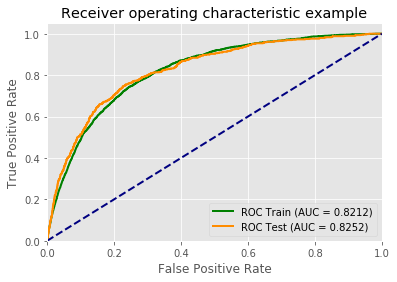

In [175]:
# print model results
get_performance_metrics(y_train, p_train_pred, y_test, p_test_pred)
plot_roc_curve(y_train, p_train_pred, y_test, p_test_pred)

In [ ]:
#Understanding the Estimated Coefficients

In [178]:
a = df_fillna_1.drop(columns=['LOAN_ID','Delq.Status_D90'])
a.columns

Index(['ORIG_RT', 'ORIG_AMT', 'ORIG_TRM', 'OLTV', 'NUM_BO', 'DTI', 'CSCORE_B',
       'NUM_UNIT', 'ORIG_CHN_B', 'ORIG_CHN_C', 'ORIG_CHN_R',
       'Seller.Name_AMERIHOME MORTGAGE COMPANY, LLC',
       'Seller.Name_CALIBER HOME LOANS, INC.',
       'Seller.Name_FAIRWAY INDEPENDENT MORTGAGE CORPORATION',
       'Seller.Name_FLAGSTAR BANK, FSB',
       'Seller.Name_FRANKLIN AMERICAN MORTGAGE COMPANY',
       'Seller.Name_FREEDOM MORTGAGE CORP.',
       'Seller.Name_GUILD MORTGAGE COMPANY',
       'Seller.Name_JPMORGAN CHASE BANK, NATIONAL ASSOCIATION',
       'Seller.Name_LOANDEPOT.COM, LLC', 'Seller.Name_MOVEMENT MORTGAGE, LLC',
       'Seller.Name_NATIONSTAR MORTGAGE, LLC', 'Seller.Name_OTHER',
       'Seller.Name_PMTT4', 'Seller.Name_QUICKEN LOANS INC.',
       'Seller.Name_TRUIST BANK (FORMERLY SUNTRUST BANK)',
       'Seller.Name_U.S. BANK N.A.',
       'Seller.Name_UNITED SHORE FINANCIAL SERVICES, LLC DBA UNITED WHOLESALE MORTGAGE',
       'Seller.Name_WELLS FARGO BANK, N.A.', 'PURP

In [ ]:
selected_features = ['ORIG_RT', 'ORIG_AMT', 'ORIG_TRM', 'OLTV', 'NUM_BO', 'DTI', 'CSCORE_B',
       'NUM_UNIT', 'ORIG_CHN_B', 'ORIG_CHN_C', 'ORIG_CHN_R',
       'Seller.Name_AMERIHOME MORTGAGE COMPANY, LLC',
       'Seller.Name_CALIBER HOME LOANS, INC.',
       'Seller.Name_FAIRWAY INDEPENDENT MORTGAGE CORPORATION',
       'Seller.Name_FLAGSTAR BANK, FSB',
       'Seller.Name_FRANKLIN AMERICAN MORTGAGE COMPANY',
       'Seller.Name_FREEDOM MORTGAGE CORP.',
       'Seller.Name_GUILD MORTGAGE COMPANY',
       'Seller.Name_JPMORGAN CHASE BANK, NATIONAL ASSOCIATION',
       'Seller.Name_LOANDEPOT.COM, LLC', 'Seller.Name_MOVEMENT MORTGAGE, LLC',
       'Seller.Name_NATIONSTAR MORTGAGE, LLC', 'Seller.Name_OTHER',
       'Seller.Name_PMTT4', 'Seller.Name_QUICKEN LOANS INC.',
       'Seller.Name_TRUIST BANK (FORMERLY SUNTRUST BANK)',
       'Seller.Name_U.S. BANK N.A.',
       'Seller.Name_UNITED SHORE FINANCIAL SERVICES, LLC DBA UNITED WHOLESALE MORTGAGE',
       'Seller.Name_WELLS FARGO BANK, N.A.', 'PURPOSE_C', 'PURPOSE_P',
       'PURPOSE_R', 'PROP_TYP_CO', 'PROP_TYP_CP', 'PROP_TYP_MH', 'PROP_TYP_PU',
       'PROP_TYP_SF', 'OCC_STAT_I', 'OCC_STAT_P', 'OCC_STAT_S', 'FTHB_FLG_N',
       'FTHB_FLG_Y', 'RELOCATION_FLG_N', 'RELOCATION_FLG_Y']

In [214]:
df_coeffs = pd.DataFrame(list(zip(selected_features, model_cv.coef_.flatten()))).sort_values(by=[1], ascending=False)
df_coeffs.columns = ['feature', 'coeff']
df_coeffs

AttributeError: 'LogisticRegressionCV' object has no attribute 'coef'

In [179]:
df_coeffs = pd.DataFrame(list(zip(selected_features, model_cv.coef_.flatten()))).sort_values(by=[1], ascending=False)
df_coeffs.columns = ['feature', 'coeff']
df_coeffs

,feature,coeff
5,OLTV,0.064230
3,ORIG_AMT,0.058350
0,ORIG_CHN,0.057846
2,ORIG_RT,0.036926
9,FTHB_FLG,0.012320
11,PROP_TYP,0.003326
12,NUM_UNIT,0.000995
8,CSCORE_B,0.000084
15,RELOCATION_FLG,-0.000321
14,Product.Type,-0.000915


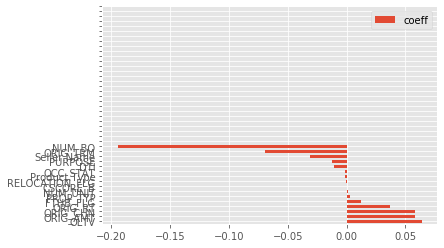

In [180]:
ax = df_coeffs.plot.barh()
t = np.arange(X.shape[1])
ax.set_yticks(t)
ax.set_yticklabels(df_coeffs['feature'])
plt.show()

In [185]:
# define function to perform train, test, and get model performance
def train_test_model(clf, X_train, y_train, X_test, y_test):
    # Fit a model by providing X and y from training set
    clf.fit(X_train, y_train)

    # Make prediction on the training data
    y_train_pred = clf.predict(X_train)
    p_train_pred = clf.predict_proba(X_train)[:,1]

    # Make predictions on test data
    y_test_pred = clf.predict(X_test)
    p_test_pred = clf.predict_proba(X_test)[:,1]

    # print model results
    get_performance_metrics(y_train, p_train_pred, y_test, p_test_pred)
    plot_roc_curve(y_train, p_train_pred, y_test, p_test_pred)

In [209]:
# Random Forest 
from sklearn.ensemble import RandomForestClassifier

# Choose some parameter combinations to try
parameters = {'n_estimators': 5,
              'max_features': 'auto',
              'criterion': 'gini',
              'max_depth': 3,
              'min_samples_split': 2,
              'min_samples_leaf': 3,
              'random_state': 0,
              'n_jobs': -1
              }

In [210]:
clf = RandomForestClassifier(**parameters)

In [211]:
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=-1,
                       oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

C:\Users\rhoda\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rhoda\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              train      test
metrics                      
AUC        0.970729  0.828563
Accuracy   0.993366  0.993137
Precision  0.000000  0.000000
Recall     0.000000  0.000000
f1-score   0.000000  0.000000


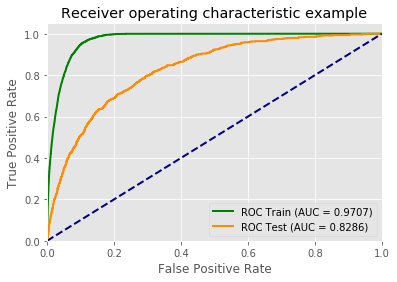

In [186]:
train_test_model(clf, X_train, y_train, X_test, y_test)

              train      test
metrics                      
AUC        0.993938  0.525270
Accuracy   0.993492  0.992879
Precision  0.664122  0.107143
Recall     0.038462  0.005128
f1-score   0.072712  0.009788


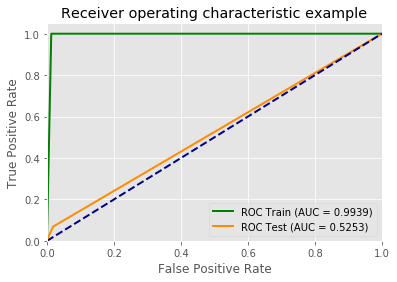

In [212]:
#Single KNN
from sklearn.neighbors import KNeighborsClassifier
parameters = {
    #'weights':'distance',
    'n_neighbors':3,
    'leaf_size':10
}
base_classifier = KNeighborsClassifier(**parameters)
clf = base_classifier

# Train test model
train_test_model(clf, X_train, y_train, X_test, y_test)

              train      test
metrics                      
AUC        0.865269  0.825935
Accuracy   0.993674  0.992703
Precision  0.900763  0.025641
Recall     0.052166  0.001709
f1-score   0.098621  0.003205


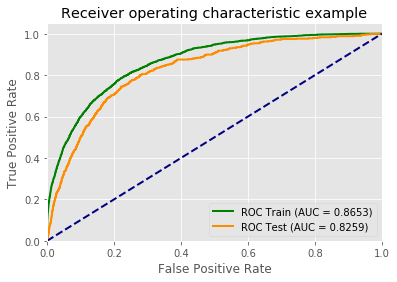

In [213]:
# http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html
from sklearn.ensemble import GradientBoostingClassifier

# Choose some parameter combinations to try
parameters = {
    'n_estimators': 50,
    'max_depth': 5,
    'learning_rate': 0.2,
    'random_state': 42
}

# parameters = {
#     'n_estimators': 50,
#     'max_depth': 5,
#     'learning_rate': 0.2,
#     'subsample': 0.7,
#     'max_features':0.8,
#     'random_state': 42
# }

clf = GradientBoostingClassifier(**parameters)

# Train test model
train_test_model(clf, X_train, y_train, X_test, y_test)